# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a [Kaggle competition](https://www.kaggle.com/c/dog-breed-identification) on classifying dog breeds.


## Objectives

In this lab you will: 

- Compare and apply multiple techniques for tuning a model using data augmentation and pretrained models  

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data).

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code per se, but download and decompress the data

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [18]:
import pandas as pd

In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EC14-1B81

 Directory of C:\Users\Desmond\Course-Work\Module6\Section48\image-classification-lab-online-ds

09/10/2020  02:14 PM    <DIR>          .
09/10/2020  02:14 PM    <DIR>          ..
07/11/2020  11:31 AM                69 .gitignore
09/10/2020  02:08 PM    <DIR>          .ipynb_checkpoints
07/11/2020  11:31 AM                96 .learn
07/11/2020  11:31 AM        28,153,952 Baseline_CNN.h5
07/11/2020  11:31 AM         6,585,896 Baseline_CNN_dog_subset_run2.h5
07/11/2020  11:31 AM             1,849 CONTRIBUTING.md
09/10/2020  02:14 PM    <DIR>          data_org_subset
07/11/2020  11:31 AM        93,691,122 history_vgg19_10epochs.pickle
09/10/2020  02:14 PM            17,684 index.ipynb
07/11/2020  11:31 AM             1,371 LICENSE.md
07/11/2020  11:31 AM            95,204 multiclass_cnfmatx.png
07/11/2020  11:31 AM             5,623 README.md
07/11/2020  11:31 AM        93,613,256 vgg19_3breeds_4epochs.h5
07/11/2020  11:3

In [14]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [15]:
ls dog_breeds/train/ | head -5

Parameter format not correct - "rain".



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the test data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as `'boston_bull'`, `'toy_poodle'`, and `'scottish_deerhound'`.

You're nested file structure should look like this:
* train
    * category_1
    * category_2
    * category_3
    ...
* val
    * category_1
    * category_2
    * category_3
    ...
* test 
    * category_1
    * category_2
    * category_3
    ...  

> **Hint**: To do this, you can use the `os` module which will you can use to execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder: 

```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation, and test sets. Then, use your pandas DataFrame to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the DataFrame to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [16]:
print('Number of unique breeds:', df.breed.nunique())
print(df.breed.value_counts()[:10])

Number of unique breeds: 120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
Name: breed, dtype: int64


## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [35]:
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

from keras import layers
from keras import models
from keras import optimizers
import datetime

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG-19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [50]:
# Initialize Base

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

# Define Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

cnn_base.trainable = False

# confirming layer is trainable
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# checking for trainable weights 
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_4 True
dense_20 True
dense_21 True
dense_22 True
dense_23 True
dense_24 True
10
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
____________________

In [51]:
# Preprocessing/Problem Setup
new_root_dir = 'data_org_subset/'

train_dir = '{}train'.format(new_root_dir)
validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)


# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=4,
                              validation_data=val_generator,
                              validation_steps=10)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/4
8/8 [==============================] - 64s 8s/step - loss: 1.0814 - acc: 0.4118 - val_loss: 1.0390 - val_acc: 0.4667
Epoch 2/4
8/8 [==============================] - 57s 7s/step - loss: 1.0549 - acc: 0.4379
Epoch 3/4
8/8 [==============================] - 57s 7s/step - loss: 1.0325 - acc: 0.5033
Epoch 4/4
8/8 [==============================] - 61s 8s/step - loss: 1.0110 - acc: 0.5625
Training took a total of 0:04:33.863979


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

In [52]:
history.history

{'loss': [1.0814348459243774,
  1.0549132823944092,
  1.0324705839157104,
  1.0109550952911377],
 'acc': [0.4117647111415863, 0.43790850043296814, 0.5032680034637451, 0.5625],
 'val_loss': [1.0390150547027588],
 'val_acc': [0.46666666865348816]}

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

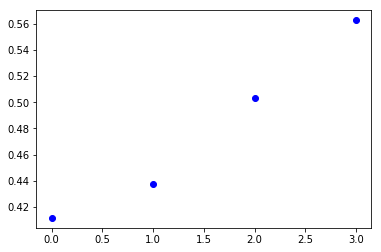

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
# Save model
model.save('vgg19_3breeds_4epochs.h5')

In [41]:
import pickle

with open('history_vgg19__3breeds_4epochs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

TypeError: can't pickle _thread.RLock objects

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [ ]:
# Your code here

## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.